# Step 0: Explore the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Jumlah Beras  28 non-null     float64
dtypes: float64(1)
memory usage: 356.0 bytes


,Jumlah Beras
0,6776757.0
1,6792520.0
2,6542875.0
3,6455129.0
4,6535429.0


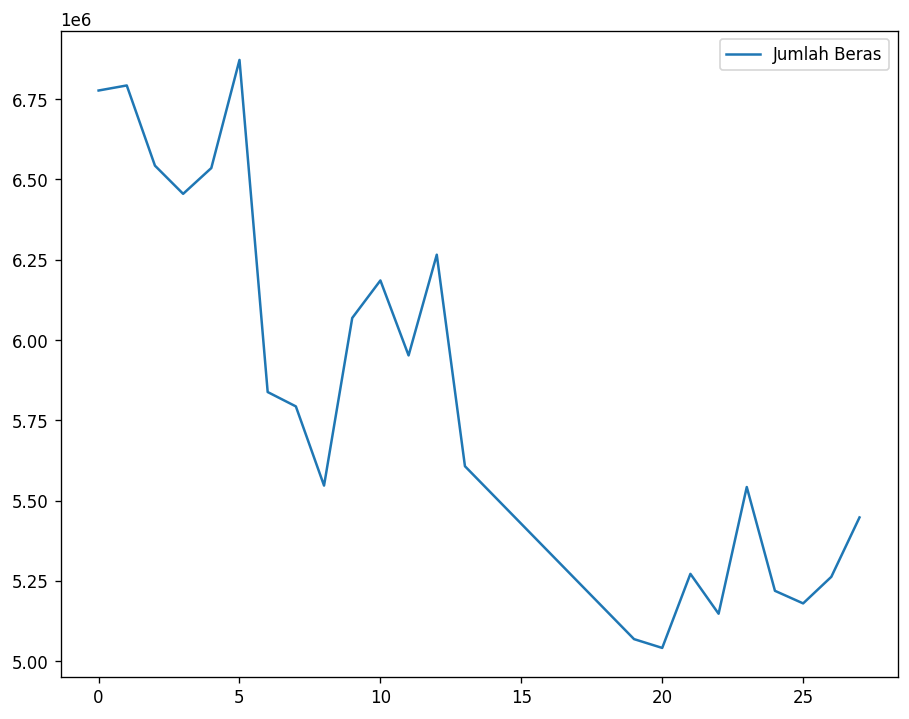

In [3]:
import pandas as pd
import matplotlib.pyplot as pltq
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA

# Read the CSV file into a DataFrame
df = pd.read_csv('website_data.csv')
df.info()
# Plot the DataFrame
df.plot()
df.head()



# Step 1: Check for stationarity of time series

## Method #1: ADF test 

In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.964185
p-value: 0.302494


## Method #2: time series plot and ACF plot and PACF plot

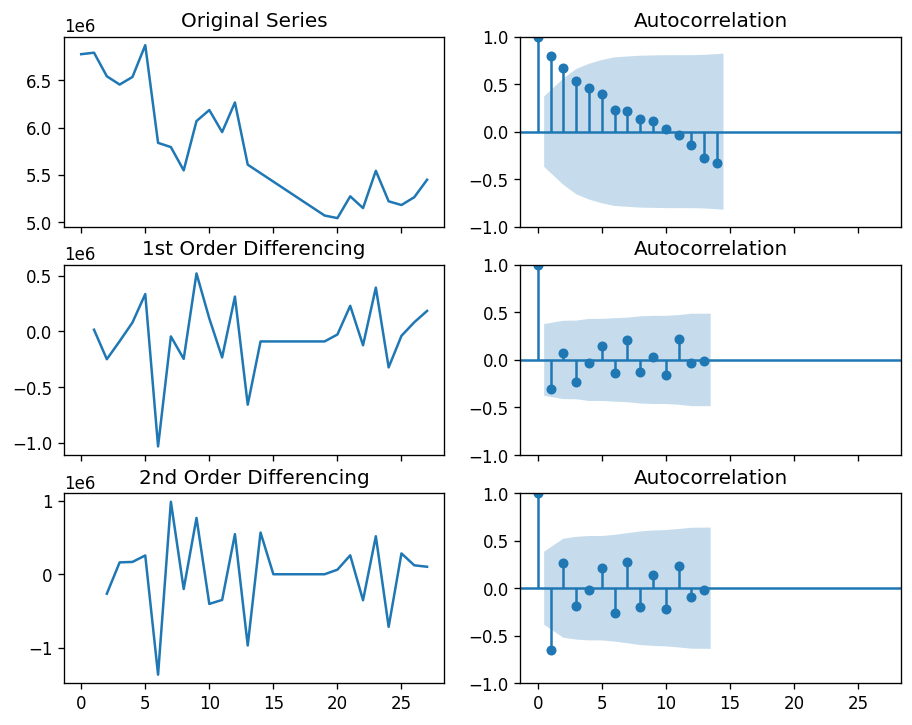

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## Transform to stationary: differencing

<Axes: >

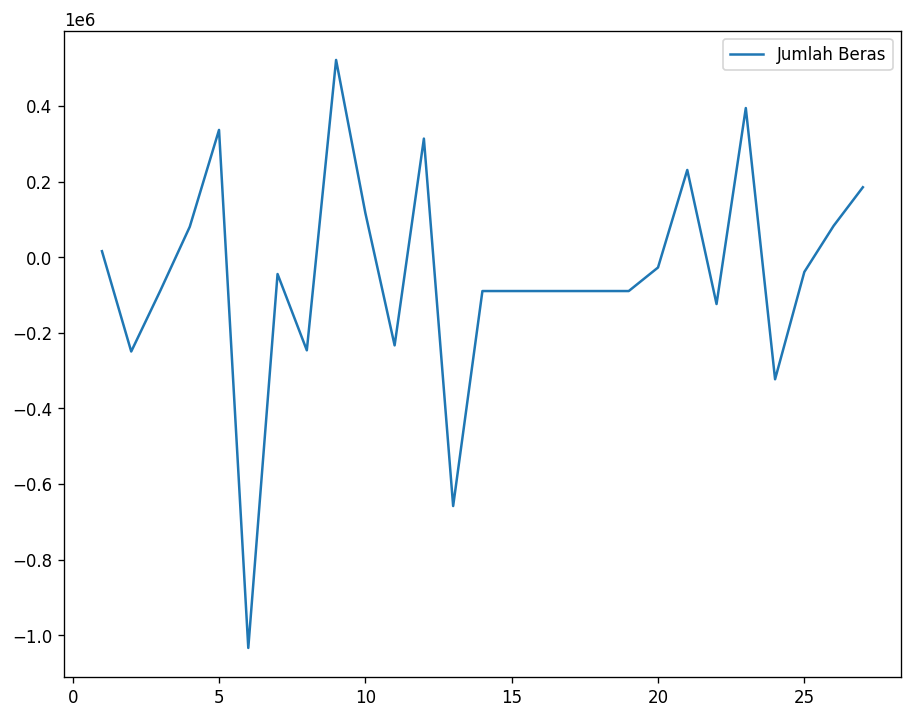

In [6]:
df_diff = df.diff().dropna()
df_diff.plot()

In [7]:
adf_test = adfuller(df_diff)
print(f'p-value: {adf_test[1]}')

p-value: 3.3807036928813528e-09


<Axes: >

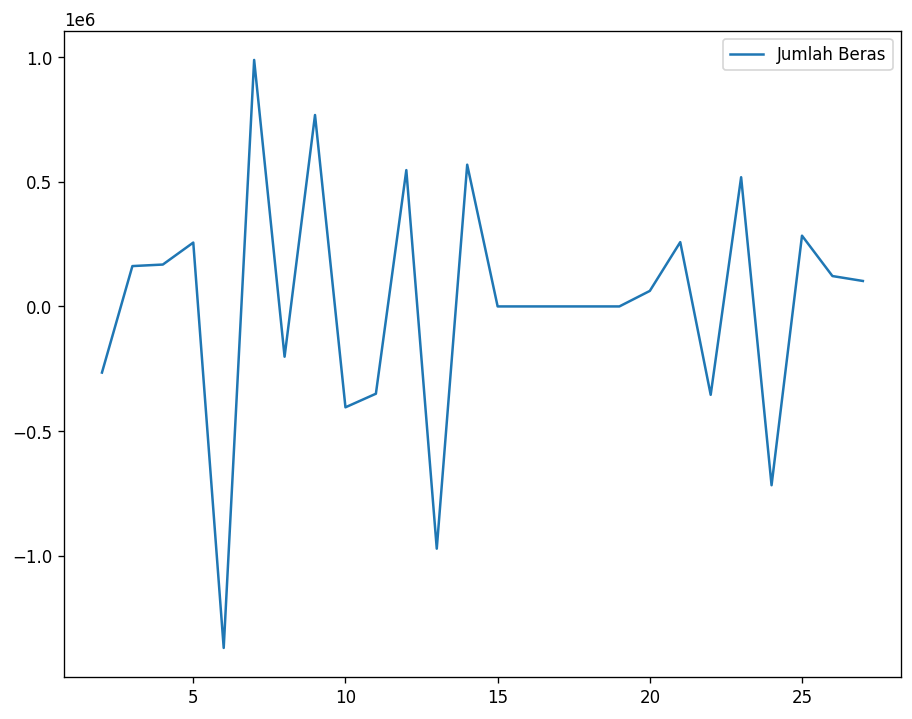

In [8]:
df_diff = df.diff().diff().dropna()
df_diff.plot()

In [9]:
# Menampilkan nilai dari plot differencing
print("Nilai plot differencing:")
print(df.diff().diff())

Nilai plot differencing:
    Jumlah Beras
0            NaN
1            NaN
2     -265408.00
3      161899.00
4      168046.00
5      256224.00
6    -1370318.00
7      989098.00
8     -201773.00
9      768130.00
10    -404795.00
11    -350297.00
12     547001.00
13    -972016.00
14     568746.00
15          0.00
16          1.00
17         -1.00
18          0.00
19          0.00
20      62261.10
21     258016.30
22    -354662.30
23     518494.30
24    -717513.40
25     283931.84
26     121895.32
27     102158.15


In [10]:
df_diff = df.diff(2).dropna()

In [11]:

adf_test = adfuller(df_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.012520489243707186


In [12]:
df_diff = df.diff().diff().dropna()

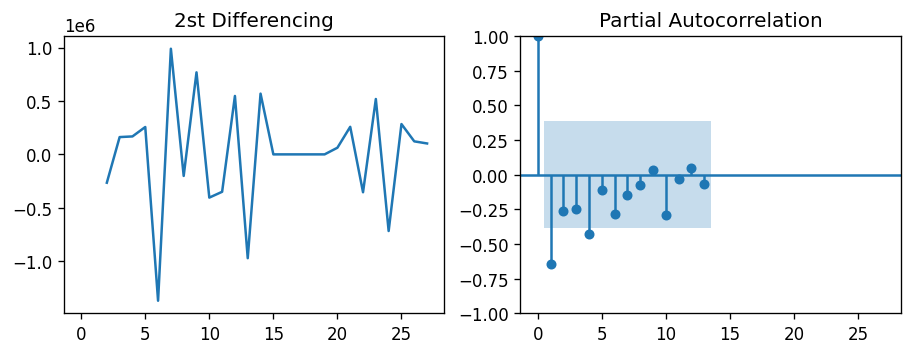

In [13]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.diff().diff().dropna(), ax=axes[1])

plt.show()

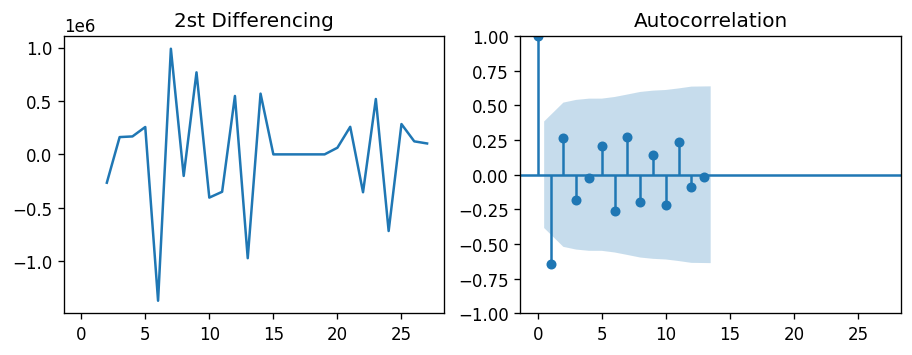

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.diff().diff().dropna(), ax=axes[1])

plt.show()

# Step 2: Determine ARIMA models parameters p, q

ACF Values:
[ 1.         -0.64527907  0.26504865 -0.18203541 -0.0233518   0.21024399
 -0.26273574  0.27164952 -0.19657813  0.13963313 -0.21613597  0.23614597
 -0.09170462 -0.01920568  0.121096  ]

PACF Values:
[ 1.         -0.67109023 -0.29697016 -0.30958752 -0.59749212 -0.35880627
 -0.86941192 -4.55998357  1.23001773  0.70041959  0.06558423  0.57477945
  0.85301678]


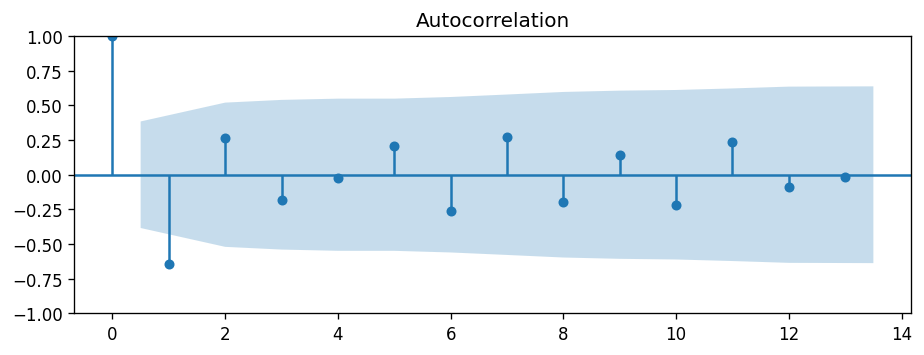

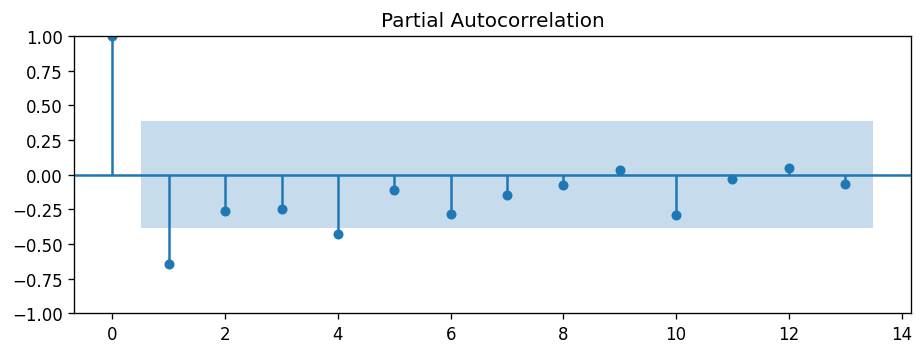

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF values
acf_values = acf(df_diff)
pacf_values = pacf(df_diff)

# Print ACF values
print("ACF Values:")
print(acf_values)

# Print PACF values
print("\nPACF Values:")
print(pacf_values)

# Plot ACF and PACF
acf_diff = plot_acf(df_diff)
pacf_diff = plot_pacf(df_diff)


# Step 3: Fit the ARIMA model

In [16]:
from statsmodels.tsa.arima.model import ARIMA
# 1,2,1 ARIMA Model
model = ARIMA(df, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Jumlah Beras   No. Observations:                   28
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -377.272
Date:                Fri, 27 Sep 2024   AIC                            760.544
Time:                        10:42:07   BIC                            764.318
Sample:                             0   HQIC                           761.630
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6964      0.094      7.371      0.000       0.511       0.882
ma.L1         -1.0000      0.142     -7.037      0.000      -1.279      -0.721
sigma2      1.409e+11   1.01e-12    1.4e+23      0.0

# Step 4: White Noise Residual Test

               0
0   6.776757e+06
1  -5.732096e+06
2  -5.339346e+05
3  -1.250355e+05
4  -5.668566e+04
5   8.787343e+04
6  -1.468451e+06
7   5.915403e+05
8  -3.425329e+05
9   5.895851e+05
10 -3.879262e+05
11 -4.329549e+05
12  3.825950e+05
13 -9.909114e+05
14  3.052925e+05
15 -1.055854e+05
16 -1.006931e+05
17 -9.623672e+04
18 -9.215588e+04
19 -8.840766e+04
20 -2.269133e+04
21  1.928227e+05
22 -3.484998e+05
23  4.291558e+05
24 -6.639179e+05
25  1.413629e+05
26  6.106597e+04
27  7.646795e+04


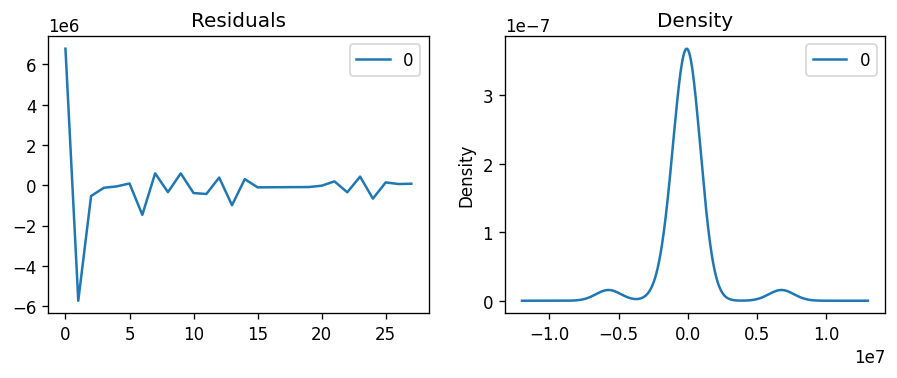

In [17]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
print (residuals)
plt.show()


# Plot Model Fitted In Data

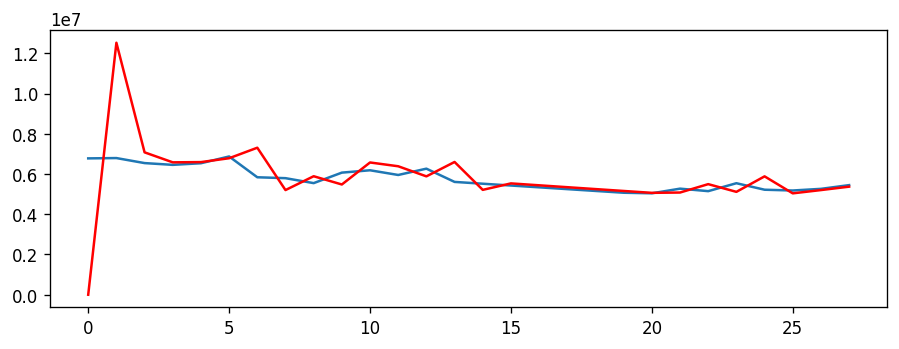

In [18]:
# Actual vs Fitted
plt.plot(df, label='Actual')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')

# Step 5:  Find the optimal ARIMA model using Out-of-Time Cross validation

## divide the data into train data and test data with a ratio of 80:20

In [19]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
msk = (df.index < len(df)-8)
df_train = df[msk].copy()
df_test = df[~msk].copy()


## Now, we will build the ARIMA model on training dataset, forecast and plot it.

                               SARIMAX Results                                
Dep. Variable:           Jumlah Beras   No. Observations:                   20
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -262.829
Date:                Fri, 27 Sep 2024   AIC                            531.657
Time:                        10:42:18   BIC                            534.328
Sample:                             0   HQIC                           532.026
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7241      0.128      5.660      0.000       0.473       0.975
ma.L1         -0.9993      0.198     -5.040      0.000      -1.388      -0.611
sigma2      1.884e+11   1.06e-12   1.78e+23      0.0

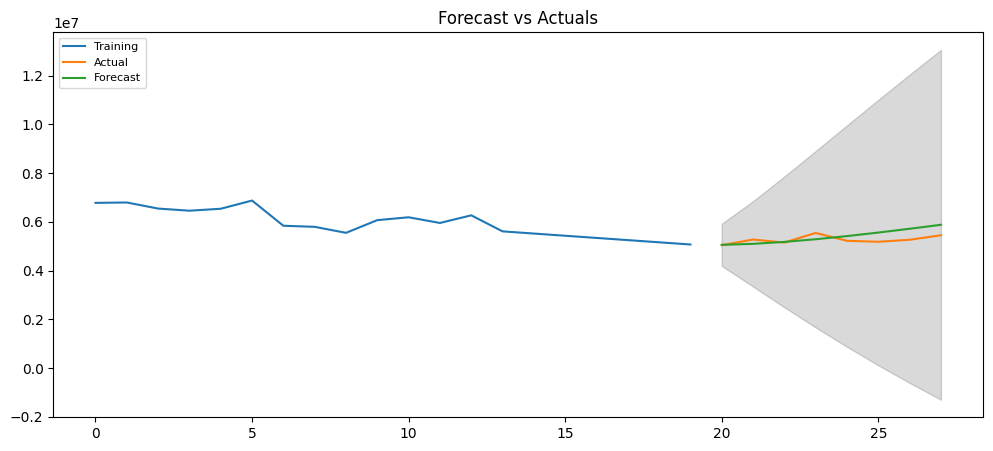

In [20]:
from scipy import stats
import numpy as np

# Build Model 
model = ARIMA(df_train, order=(1, 2, 1))  
fitted = model.fit()
print(fitted.summary())

# Forecast
n_periods = 8
fc = fitted.forecast(steps=n_periods)
se = fitted.get_forecast(steps=n_periods).se_mean  # Get standard error

# Calculate confidence interval
alpha = 0.05  # 95% confidence interval
z_score = stats.norm.ppf(1 - alpha / 2)  # Z-score for the given alpha
conf = np.array([fc - z_score * se, fc + z_score * se]).T

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='Training')
plt.plot(df_test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


## Prediction value results using the ARIMA (1,2,1) model on test data

In [21]:
print("Forecasted values:")
print(fc_series)

print("\nLower bounds of confidence interval:")
print(lower_series)

print("\nUpper bounds of confidence interval:")
print(upper_series)

Forecasted values:
20    5.054876e+06
21    5.095448e+06
22    5.175635e+06
23    5.284505e+06
24    5.414145e+06
25    5.558822e+06
26    5.714388e+06
27    5.877837e+06
Name: predicted_mean, dtype: float64

Lower bounds of confidence interval:
20    4.188348e+06
21    3.341084e+06
22    2.490294e+06
23    1.662777e+06
24    8.688094e+05
25    1.108650e+05
26   -6.121954e+05
27   -1.303078e+06
dtype: float64

Upper bounds of confidence interval:
20    5.921404e+06
21    6.849812e+06
22    7.860976e+06
23    8.906234e+06
24    9.959480e+06
25    1.100678e+07
26    1.204097e+07
27    1.305875e+07
dtype: float64


In [22]:
# Access log-likelihood from fitted ARIMA model
log_likelihood = fitted.llf
print("Log-Likelihood:", log_likelihood)


Log-Likelihood: -262.8286491304811


<Axes: >

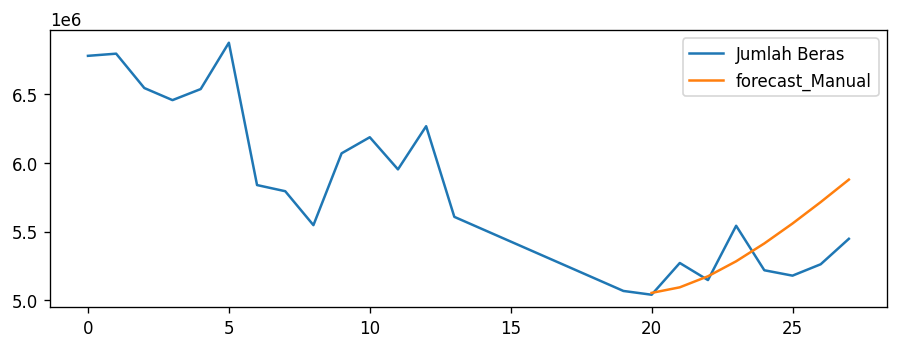

In [23]:
forecast_test = fitted.forecast(len(df_test))

df['forecast_Manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()


Ljung-Box Test Results:
     lb_stat  lb_pvalue  Autocorrelation
1   5.097928   0.023954        -0.087540
2   5.107941   0.077772        -0.053818
3   5.111836   0.163789        -0.037995
4   5.113901   0.275809         0.531253
5   5.542229   0.353338        -0.783781
6   6.522183   0.367300         0.531370
7   6.799656   0.450034        -0.487124
8   6.999468   0.536690         0.529261
9   7.249061   0.611206        -0.023677
10  7.249635   0.701686        -0.452110
11  7.402956   0.765576         0.829376
12  7.938283   0.789935              NaN
0        NaN        NaN        -0.727810


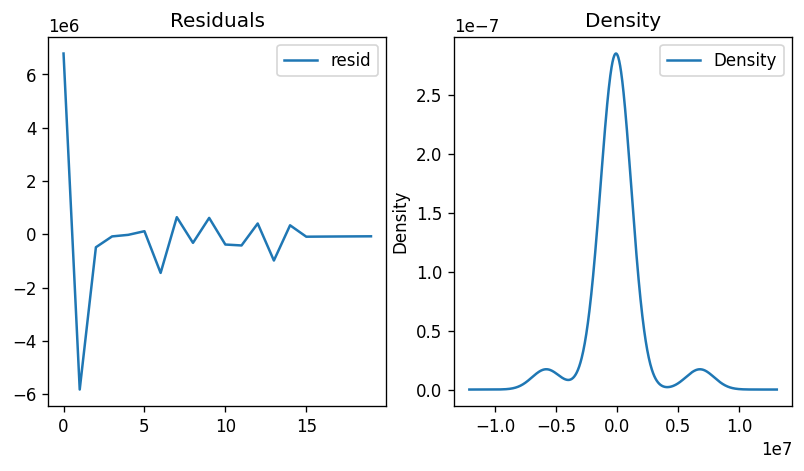

In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = pd.DataFrame(fitted.resid, columns=['resid'])
# Plot residual errors
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
residuals.plot(title="Residuals", ax=ax[0])
# Plot density with labeled lines
residual_density = residuals.plot(kind='kde', title='Density', ax=ax[1])
residual_density.lines[0].set_label('Density')
ax[1].legend(loc='best')
# Perform Ljung-Box test on residuals with return_df=True
lags = 12  # Number of lags considered
results_df = acorr_ljungbox(residuals, lags=lags, return_df=True)
# Initialize autocorrelation column with NaN
results_df['Autocorrelation'] = np.nan
# Calculate autocorrelation for each lag
for lag in range(1, lags + 1):
    results_df.at[lag - 1, 'Autocorrelation'] = residuals.iloc[:, 0].autocorr(lag=lag)
# Display results
print("Ljung-Box Test Results:")
print(results_df)
# Show plots
plt.show()

# Step 4: Make time series predictions

Prediksi untuk tahun selanjutnya: 20    5.054876e+06
21    5.095448e+06
22    5.175635e+06
23    5.284505e+06
24    5.414145e+06
25    5.558822e+06
26    5.714388e+06
27    5.877837e+06
28    6.046996e+06
29    6.220287e+06
Name: predicted_mean, dtype: float64


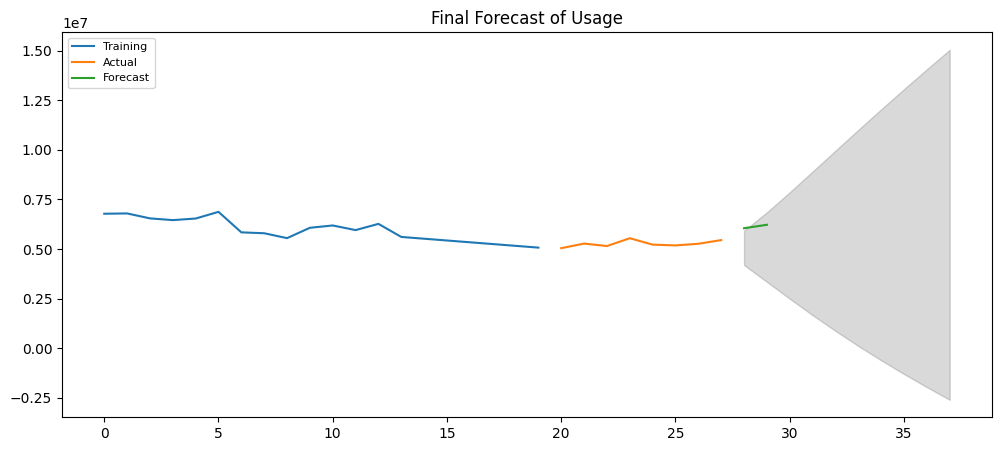

In [24]:
# Melakukan prediksi untuk tahun selanjutnya
n_periods = 10
forecast_next = fitted.forecast(steps=n_periods)  # Memprediksi dua langkah ke depan, yaitu untuk tahun selanjutnya

# Mengambil standard error
se = fitted.get_forecast(steps=n_periods).se_mean  # Mengambil standard error

# Menghitung confidence interval
alpha = 0.05  # 95% confidence interval
z_score = stats.norm.ppf(1 - alpha / 2)  # Z-score untuk alpha yang diberikan
conf_next = np.array([forecast_next - z_score * se, forecast_next + z_score * se])

# Membuat pandas series
index_of_fc_next = np.arange(len(df),len(df)+ n_periods)
fc_series_next = pd.Series(forecast_next, index=index_of_fc_next)
lower_series_next = pd.Series(conf_next[0], index=index_of_fc_next)
upper_series_next = pd.Series(conf_next[1], index=index_of_fc_next)

# Menampilkan hasil prediksi
print("Prediksi untuk tahun selanjutnya:", forecast_next)

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(df_train, label='Training')
plt.plot(df_test, label='Actual')
plt.plot(fc_series_next, label='Forecast')
plt.fill_between(lower_series_next.index, lower_series_next, upper_series_next, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.title("Final Forecast of Usage")
plt.show()


In [25]:
print("Forecasted values:")
print(fc_series_next)

print("\nLower bounds of confidence interval:")
print(lower_series_next)

print("\nUpper bounds of confidence interval:")
print(upper_series_next)

Forecasted values:
28    6.046996e+06
29    6.220287e+06
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37             NaN
Name: predicted_mean, dtype: float64

Lower bounds of confidence interval:
28    4.188348e+06
29    3.341084e+06
30    2.490294e+06
31    1.662777e+06
32    8.688094e+05
33    1.108650e+05
34   -6.121954e+05
35   -1.303078e+06
36   -1.965038e+06
37   -2.601373e+06
dtype: float64

Upper bounds of confidence interval:
28    5.921404e+06
29    6.849812e+06
30    7.860976e+06
31    8.906234e+06
32    9.959480e+06
33    1.100678e+07
34    1.204097e+07
35    1.305875e+07
36    1.405903e+07
37    1.504195e+07
dtype: float64


# Step 5: Evaluate model predictions

In [26]:
# Accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, fc_series)
mape = mean_absolute_percentage_error(df_test, fc_series)
rmse = np.sqrt(mean_squared_error(df_test, fc_series))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 241303.57495754887
mape - manual: 0.04539738050117483
rmse - manual: 289124.8335139613


In [27]:
accuracy = (100 - mape*100)  

# Menghitung dan mencetak Akurasi Prediksi
print(f"Akurasi Prediksi: {accuracy}%")

Akurasi Prediksi: 95.46026194988252%


In [28]:
from scipy.stats import chi2

# Tentukan tingkat signifikansi dan derajat kebebasan
alpha = 0.05
df = 10 # 12-2

# Mendapatkan nilai kritis Chi-square
chi2_critical_value = chi2.ppf(1 - alpha, df)
print(f'Chi-square critical value for alpha={alpha} and df={df}: {chi2_critical_value}')

Chi-square critical value for alpha=0.05 and df=10: 18.307038053275146


In [29]:
from scipy.stats import chi2

# Tentukan tingkat signifikansi dan derajat kebebasan
alpha = 0.05
df = 22 # 24-2

# Mendapatkan nilai kritis Chi-square
chi2_critical_value = chi2.ppf(1 - alpha, df)
print(f'Chi-square critical value for alpha={alpha} and df={df}: {chi2_critical_value}')

Chi-square critical value for alpha=0.05 and df=22: 33.92443847144381


# Other suggestions